In [2]:
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as plt
from scipy.optimize import lsq_linear
import numpy.linalg as la
import itertools

In [11]:
def generate_Z(A):
    dim = 3
    l = list(set([j 
     for i in itertools.combinations_with_replacement([-1,1],dim)
     for j in itertools.permutations(i,dim)]))
    x = np.array(l)
    z = A@x.T
    print(z)
    plt.plot(z[0,:], z[1,:], "co", alpha= 1, markersize=9)

In [12]:
def oracle(X, A):
    l = list(itertools.product([-1, 1], repeat=3))
    L = np.array(l)
    Z = A@L.T
    #print(Z)
    X = X.reshape(2)
    x = lsq_linear(Z, X, bounds=(-1, 1), lsmr_tol='auto' ,verbose = 0)
    return(x.cost <= 1e-70)

[[-7  3 -9  7  1 -3 -1  9]
 [-3  1 -9  3 -5 -1  5  9]]


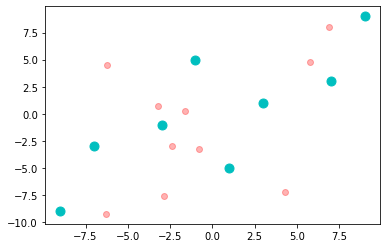

In [13]:
A = np.array([[3, 1, 5], [4, 3, 2]]);
generate_Z(A)
U = np.random.uniform(-10,10,(2,10))
for x,y in zip(U[0, :], U[1, :]):
    point = np.array([[x],[y]])
    if(oracle(point, A)):
        plt.plot(point[0], point[1], "go")
    else:
        plt.plot(point[0], point[1], "ro",  alpha=0.30)
plt.show()

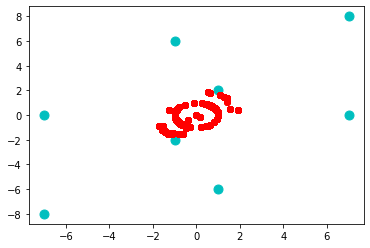

In [17]:
# Make a list/array for the final points
#tmpx - random n-stdgaussian, normalized, then scaled by delta(uniform point in the unit sphere)
X = np.array([0, 0]).reshape(2,1)
A = np.array([[0, 3, 4], [4, 3, 1]]);
generate_Z(A)
calls = 0
pos = X
out_pos = X
delta = 1
for j in range(1,1000):
    for i in range(1,10):
        temp = np.random.normal(0,1,(2,1))
        temp = temp/la.norm(temp)
        temp = temp*delta
        tmpx = X + temp 
        boolean = oracle(tmpx, A)
        if(boolean):
            calls = calls + 1
            X = tmpx
            pos = np.hstack((pos, X))
            plt.plot(pos[0, :], pos[1,:], 'ro')
    X = np.array([0, 0]).reshape(2,1)

plt.show()

In [126]:
print(calls)

33
